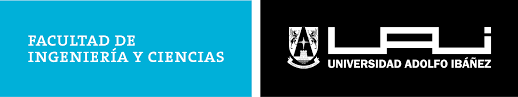


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

## **Tópicos**
* Ejercicios Regreción Lineal

### Aplique regresión lineal para predecir el presupuesto de una comuna en función de alguna de las siguientes variables:

- Metros Plaza
- Metros Parque
- Personas que Trabajan en el Municipio
- Población

In [2]:
# Importe las librerias necesarias
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
# Carge los datasets necesarios
df_codigos = pd.read_csv('data/codigos.csv', sep=';')
df_datos_comunas = pd.read_csv('data/datos_comunas.csv', sep=',')
df_presupuesto = pd.read_csv('data/presupuesto_2019.csv', sep=';')


In [4]:
# Visualice en forma tabular los datos 

# df_codigos
# df_datos_comunas
# df_presupuesto

 
***Primero estableceremos la información a trabajar, generando un solo DataFrame en común.***

In [5]:
df_mg1 = df_codigos.merge(df_datos_comunas, left_on="Código Comuna 2018", right_on="id")
df_mg2 = df_mg1.merge(df_presupuesto, left_on="id", right_on="CODIGO")

df_mg2

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna,id,metros_plaza,metros_parque,personas,CODIGO,MUNICIPIO,PRESUPUESTO
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique,1101,58460.0,94824.0,271.0,1101,IQUIQUE,59072234
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio,1107,130316.0,0.0,55.0,1107,ALTO HOSPICIO,13984411
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte,1401,NaN,NaN,NaN,1401,POZO ALMONTE,7613962
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña,1402,4050.0,0.0,8.0,1402,CAMIÑA,1584008
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane,1403,2532.0,NaN,NaN,1403,COLCHANE,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos,16301,168800.0,82226.0,19.0,16301,SAN CARLOS,10459691
341,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco,16302,21282.0,0.0,62.0,16302,COIHUECO,5001190
342,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén,16303,21925.0,0.0,22.0,16303,ÑIQUÉN,3386698
343,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián,16304,9500.0,0.0,26.0,16304,SAN FABIÁN,1798500


In [6]:
df_util = df_mg2[["id", "Nombre Provincia", "metros_plaza",	"metros_parque", "personas", "PRESUPUESTO"]]
df_util

,id,Nombre Provincia,metros_plaza,metros_parque,personas,PRESUPUESTO
0,1101,Iquique,58460.0,94824.0,271.0,59072234
1,1107,Iquique,130316.0,0.0,55.0,13984411
2,1401,Tamarugal,NaN,NaN,NaN,7613962
3,1402,Tamarugal,4050.0,0.0,8.0,1584008
4,1403,Tamarugal,2532.0,NaN,NaN,2500000
...,...,...,...,...,...,...
340,16301,Punilla,168800.0,82226.0,19.0,10459691
341,16302,Punilla,21282.0,0.0,62.0,5001190
342,16303,Punilla,21925.0,0.0,22.0,3386698
343,16304,Punilla,9500.0,0.0,26.0,1798500


***Genere un proceso de limpieza de datos***

In [7]:
df_util.info() #Verificamos que los datos están en su correcto formato
               #lo que nos indica que PRESUPUESTO esta en formato de texto
               #cosa que no corresponde ya que deberia ser numerico en formato int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                345 non-null    int64  
 1   Nombre Provincia  345 non-null    object 
 2   metros_plaza      326 non-null    float64
 3   metros_parque     318 non-null    float64
 4   personas          319 non-null    float64
 5   PRESUPUESTO       345 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 18.9+ KB


In [8]:
df_util['PRESUPUESTO'] = pd.DataFrame(pd.to_numeric(df_util['PRESUPUESTO']))
               #Al aplicar la transformación, vemos que hay un dato en particular que no podemos cambiar,
               #que es "No Recepcionado", por ende, vamos a ver cuantas veces se repite para ver así que decición
               #podemos tomar al respecto.

ValueError: Unable to parse string "No Recepcionado" at position 63

In [9]:
print(df_util[df_util['PRESUPUESTO'] == "No Recepcionado"].count()) #Vemos que se repite 2 veces por cada variable (columna)

id                  2
Nombre Provincia    2
metros_plaza        2
metros_parque       2
personas            2
PRESUPUESTO         2
dtype: int64


In [10]:
df_util.shape #Recalcamos las dimensiones de nuestro df, por lo que vemos que no seria tan significativo 
              #la eliminacion de ambas filas, procedemos así

(345, 6)

In [11]:
df_util['PRESUPUESTO'].replace({'No Recepcionado':None},inplace=True) #Con esto estamos reemplazando los elementos de no recepcionados
                                                                      #a datos nulos, los que despues se eliminaran en conunto de todos los nulos

/tmp/ipykernel_26982/3008226518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
print(df_util[df_util['PRESUPUESTO'] == "No Recepcionado"].count())

id                  0
Nombre Provincia    0
metros_plaza        0
metros_parque       0
personas            0
PRESUPUESTO         0
dtype: int64


In [13]:
df_util.info() #Si volvemos a revisar PRESUUESTO sige en formato de texto, como ya no existe 
               #"No Recepcionado", podemos cambiar sin ningun problema el formato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                345 non-null    int64  
 1   Nombre Provincia  345 non-null    object 
 2   metros_plaza      326 non-null    float64
 3   metros_parque     318 non-null    float64
 4   personas          319 non-null    float64
 5   PRESUPUESTO       343 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 18.9+ KB


In [14]:
df_util['PRESUPUESTO'] = pd.DataFrame(pd.to_numeric(df_util['PRESUPUESTO']))
df_util.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                345 non-null    int64  
 1   Nombre Provincia  345 non-null    object 
 2   metros_plaza      326 non-null    float64
 3   metros_parque     318 non-null    float64
 4   personas          319 non-null    float64
 5   PRESUPUESTO       343 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 18.9+ KB


/tmp/ipykernel_26982/1784021701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
print(df_util.isnull().sum()) #Vemos que hay poca cantidad de datos nulos
                              #por ello, procederemos a eliminar directamente

id                   0
Nombre Provincia     0
metros_plaza        19
metros_parque       27
personas            26
PRESUPUESTO          2
dtype: int64


In [16]:
df_util = df_util.dropna() #Eliminamos los datos nulos

In [17]:
print(df_util.loc[df_util.duplicated()].count()) #Vemos si existen datos duplicados
                                                 #como no existen, dejamos tal cual

id                  0
Nombre Provincia    0
metros_plaza        0
metros_parque       0
personas            0
PRESUPUESTO         0
dtype: int64


In [18]:
df_util #Vemos nuestro data final limpio, donde queda con 305 filas y 6 columnas.

,id,Nombre Provincia,metros_plaza,metros_parque,personas,PRESUPUESTO
0,1101,Iquique,58460.0,94824.0,271.0,59072234.0
1,1107,Iquique,130316.0,0.0,55.0,13984411.0
3,1402,Tamarugal,4050.0,0.0,8.0,1584008.0
5,1404,Tamarugal,2300.0,0.0,17.0,3950000.0
6,1405,Tamarugal,12925.0,20749.0,18.0,5887820.0
...,...,...,...,...,...,...
340,16301,Punilla,168800.0,82226.0,19.0,10459691.0
341,16302,Punilla,21282.0,0.0,62.0,5001190.0
342,16303,Punilla,21925.0,0.0,22.0,3386698.0
343,16304,Punilla,9500.0,0.0,26.0,1798500.0


***Analice estadísticamente los datos, vea medidas de tendencia central y grafique***

In [19]:
df_num = df_util[['metros_plaza', 'metros_parque',	'personas',	'PRESUPUESTO']]
df_num.describe() #Acá vemos loss las principales medidas de tendencia central 
                  #para los datos numericos

,metros_plaza,metros_parque,personas,PRESUPUESTO
count,3.050000e+02,3.050000e+02,305.000000,3.050000e+02
mean,2.936579e+05,9.051248e+06,94.134426,1.496996e+07
std,2.194128e+06,1.377979e+08,136.877580,2.888553e+07
min,7.600000e+01,0.000000e+00,0.000000,1.323606e+06
25%,1.543700e+04,0.000000e+00,28.000000,3.234467e+06
50%,3.297200e+04,1.197400e+04,44.000000,5.469336e+06
75%,1.303160e+05,7.000000e+04,91.000000,1.276829e+07
max,3.799733e+07,2.384615e+09,1356.000000,3.399804e+08


Para visualizar en esta parte, vamos a introducir a Violin plot, una forma más bien completa de ver la distribucion de los datos numericos

**Explicación del gráfico de violin**
* Un gráfico de violín combinado con un boxplot mantiene todas las explicaciones de un boxplot.
* Las partes **más anchas** del gráfico de violín se refieren a zonas de alta probabilidad, es decir, donde hay una mayor frecuencia de datos.
* Las zonas **angostas** son zonas de baja probabilidad, donde vemos una menor frecuencia de datos.

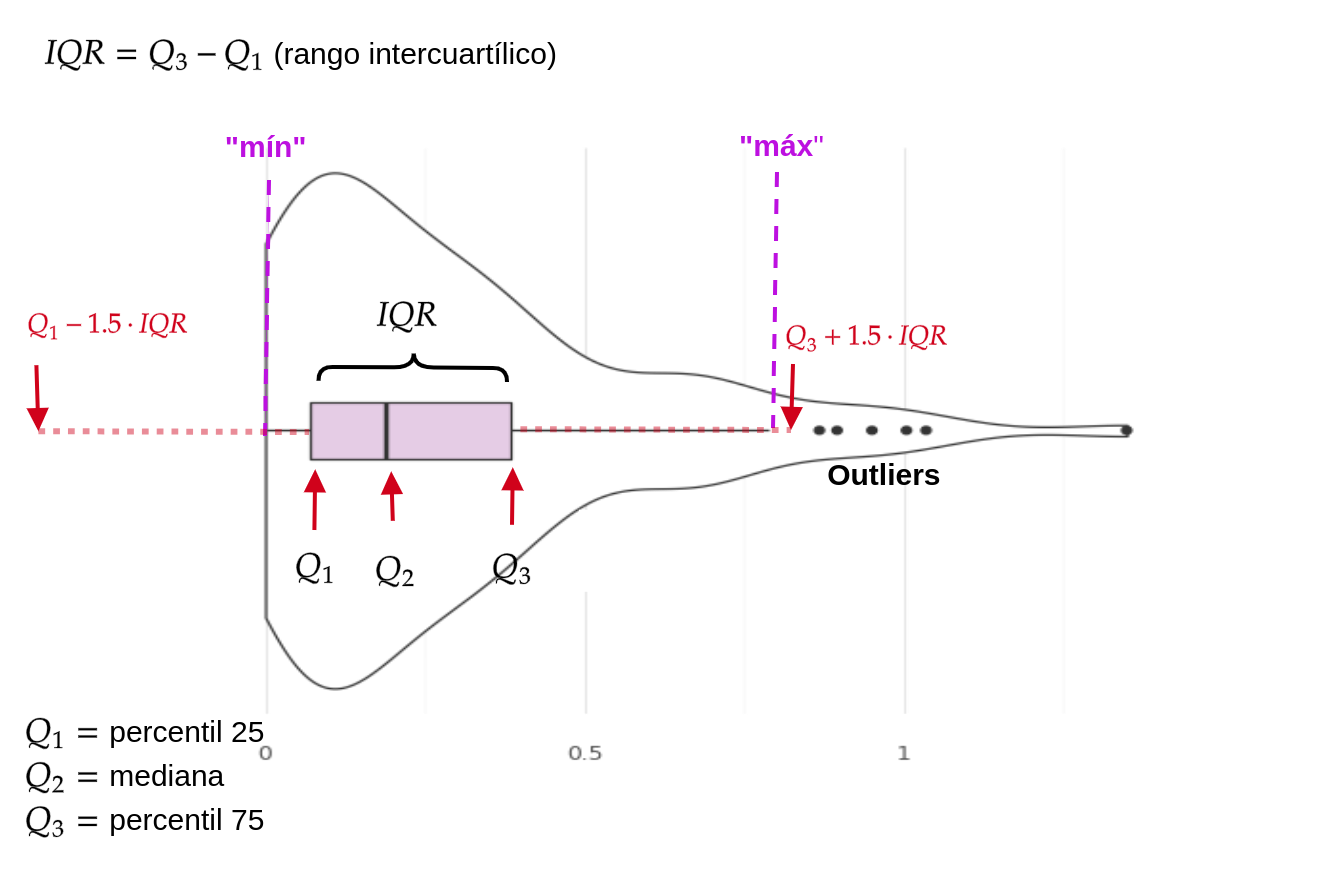

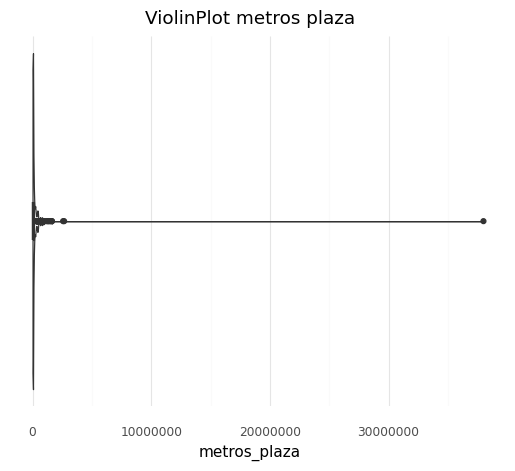

<ggplot: (8783908005217)>

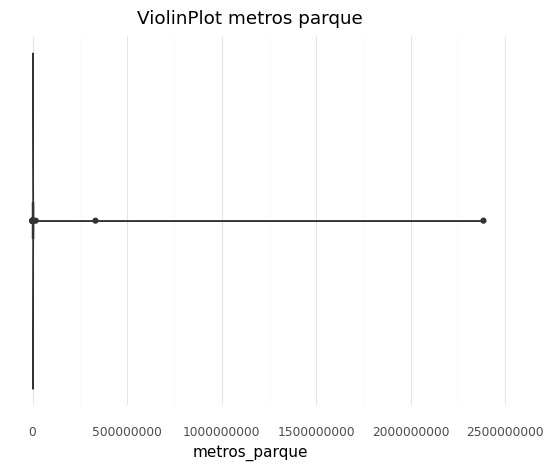

<ggplot: (8783908001015)>

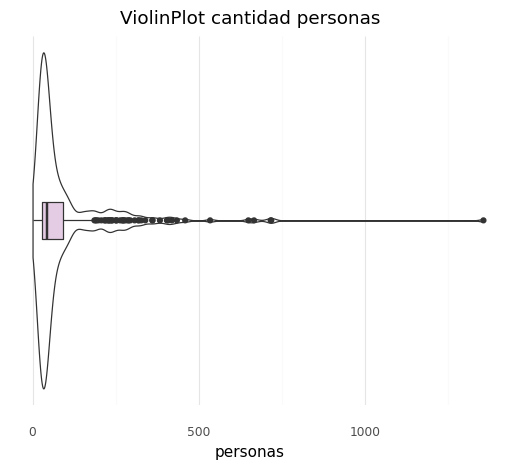

<ggplot: (8783907977469)>

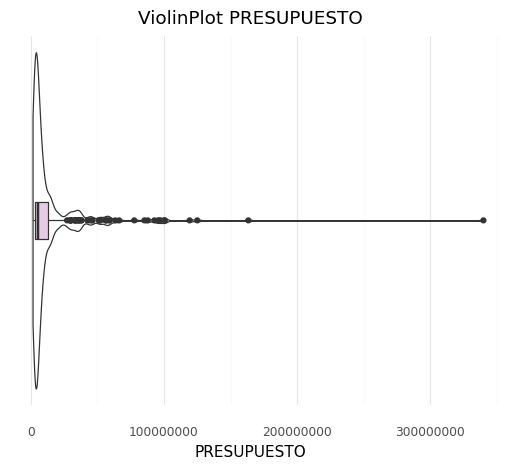

<ggplot: (8783907835058)>

In [21]:
#Visualización 

display((ggplot(df_num[['metros_plaza']])+
 aes(y="metros_plaza")+
 geom_violin(aes(x=0))+
 geom_boxplot(aes(x=0),width=0.1, fill="purple", alpha=0.2) +
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 ggtitle("ViolinPlot metros plaza")+
 xlab("")+
 coord_flip()
))

display((ggplot(df_num[['metros_parque']])+
 aes(y="metros_parque")+
 geom_violin(aes(x=0))+
 geom_boxplot(aes(x=0),width=0.1, fill="purple", alpha=0.2) +
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 ggtitle("ViolinPlot metros parque")+
 xlab("")+
 coord_flip()
))

display((ggplot(df_num[['personas']])+
 aes(y="personas")+
 geom_violin(aes(x=0))+
 geom_boxplot(aes(x=0),width=0.1, fill="purple", alpha=0.2) +
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 ggtitle("ViolinPlot cantidad personas")+
 xlab("")+
 coord_flip()
))

display((ggplot(df_num[['PRESUPUESTO']])+
 aes(y="PRESUPUESTO")+
 geom_violin(aes(x=0))+
 geom_boxplot(aes(x=0),width=0.1, fill="purple", alpha=0.2) +
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 ggtitle("ViolinPlot PRESUPUESTO")+
 xlab("")+
 coord_flip()
))

***Proceda a aplicar regresión lineal para una variable, luego repita con las demás y compare***

REGRESION LINEAL PARA METROS PLAZA

In [24]:
from sklearn.model_selection import train_test_split


data_M_plaza = df_util[['metros_plaza', 'PRESUPUESTO']]

# Queremos un set de prueba del 15% del tamaño
train_set, test_set = train_test_split(data_M_plaza, test_size=0.15)

In [25]:
train_set.head()

,metros_plaza,PRESUPUESTO
225,633325.0,30000000.0
214,111752.0,10032229.0
78,1628888.0,55996193.0
26,1499157.0,56819394.0
240,250.0,1974700.0


In [26]:
test_set.head()

,metros_plaza,PRESUPUESTO
189,26500.0,4134489.0
111,1329575.0,42998578.0
101,231241.0,14500000.0
276,136241.0,14788025.0
278,212347.0,125041538.0


In [27]:
from sklearn.linear_model import LinearRegression

# Vamos a separar la respuesta de nuestras features

X_train = train_set[['metros_plaza']] 
y_train = train_set[['PRESUPUESTO']]

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
lin_reg.predict([[4000000], [5000000], [6000000]])

/home/bruno/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([[17961817.76249094],
       [18857356.37397157],
       [19752894.9854522 ]])

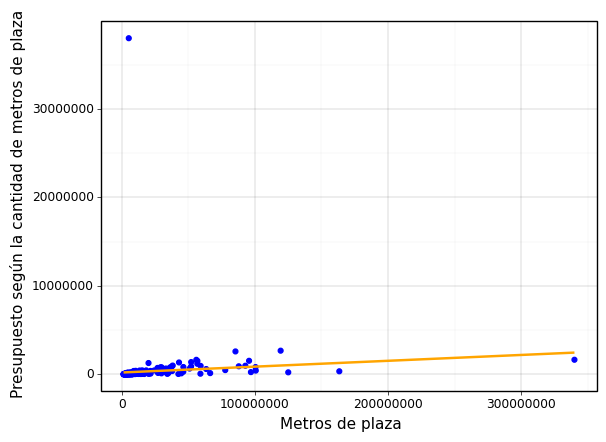

<ggplot: (8783907899805)>

In [29]:
(ggplot(df_util)+
 aes(x="PRESUPUESTO", y="metros_plaza")+
 geom_point(color="blue")+
 geom_smooth(method='lm',color="orange",se = False)+
 xlab("Metros de plaza")+
 ylab("Presupuesto según la cantidad de metros de plaza")+
 #scale_y_log10()+

theme_linedraw())

In [30]:
# La pendiente
from sklearn.linear_model import LinearRegression

lin_reg.coef_

array([[0.89553861]])

In [31]:
# El coeficiente de posición
lin_reg.intercept_

array([14379663.31656842])

In [32]:
from sklearn.metrics import mean_squared_error

X_test = test_set[['PRESUPUESTO']]
y_pred = lin_reg.predict(X_test)
y_pred

/home/bruno/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PRESUPUESTO
Feature names seen at fit time, yet now missing:
- metros_plaza



array([[1.80822579e+07],
       [5.28865502e+07],
       [2.73649732e+07],
       [2.76229107e+07],
       [1.26359189e+08],
       [1.82155776e+07],
       [1.67063765e+07],
       [1.60620911e+07],
       [2.08389030e+07],
       [2.32438209e+07],
       [1.66103981e+07],
       [2.00788066e+07],
       [2.17089000e+07],
       [1.62447505e+07],
       [1.56891020e+07],
       [1.75018826e+07],
       [2.12608925e+07],
       [3.87633680e+07],
       [7.11960457e+07],
       [1.99633134e+07],
       [1.76407931e+07],
       [1.76267171e+07],
       [2.22413308e+07],
       [1.79893842e+07],
       [1.75535659e+07],
       [1.68462050e+07],
       [1.71582510e+07],
       [1.85856043e+07],
       [1.65745882e+07],
       [1.93371752e+07],
       [2.58141573e+07],
       [2.25533114e+07],
       [2.23254120e+07],
       [5.57643715e+07],
       [1.21233777e+08],
       [1.58391154e+07],
       [2.54424058e+07],
       [2.83286372e+07],
       [2.94820265e+07],
       [1.04502462e+08],


In [33]:
y_test = test_set[['metros_plaza']]
y_test

,metros_plaza
189,26500.0
111,1329575.0
101,231241.0
276,136241.0
278,212347.0
15,6410.0
98,31372.0
337,10000.0
238,10000.0
306,290000.0


In [34]:
# Ahora calculamos el error medio cuadrado
# El primer parámetro de la función son las respuestas reales
lin_mse = mean_squared_error(y_test, y_pred)
lin_mse

1501490993397923.2

In [35]:
import numpy as np

np.sqrt(lin_mse)

38749077.323181815

Croos Validation

In [36]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
lin_reg = LinearRegression()


X = df_util[['metros_plaza']]
y = df_util[['PRESUPUESTO']]

scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([2.64238821e+08, 1.25625619e+07, 1.35373824e+07, 5.21147090e+07,
       2.63787713e+07])

In [37]:
scores

array([-6.98221544e+16, -1.57817962e+14, -1.83260722e+14, -2.71594289e+15,
       -6.95839573e+14])

In [38]:
print("Puntuación promedio de validación cruzada: {:.2f}".format(lin_rmse_scores.mean()))

Puntuación promedio de validación cruzada: 73766449.08


In [39]:
#desviación estandar
print(lin_rmse_scores.std())

96299086.75492606
